In [10]:
suppressMessages(library('ggplot2'))
suppressMessages(library('dplyr'))
suppressMessages(library('repr'))
suppressMessages(library('GoFKernel'))
suppressMessages(library('tidyverse'))
suppressMessages(library('lubridate'))
suppressMessages(library('viridis'))
suppressMessages(library('gridExtra'))

library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(GoFKernel)
library(gridExtra)
library(tibble)

library(tidyr)
library(ggplot2)
library(viridis)

# Exercise 1

The triangular distribution, in the interval (a, b), is given by the following:

$$
f(X) = \left\{ \begin{array}{2}
\frac{2(x − a)}{(b − a)(c − a)} & a\leq x < c \\
\frac{2(b − x)}{(b − a)(b − c)} & c \leq x \leq b \\
0 & \mbox{otherwise}
\end{array}
\right.
$$

where c ∈ [a, b].

*a) plot the function, given the interval (a, b)*

*b) and write an algorithm to generate random numbers from the triangular distribution*

*c) generate 10^4 random number from the distribution, show them in an histogram and
superimpose the analytical curve*

#### a) plot the function, given the interval (a, b)

I created a function to take the value of the variables from console.

Enter [A < C < B] separated by comma : 3, 5.5, 6


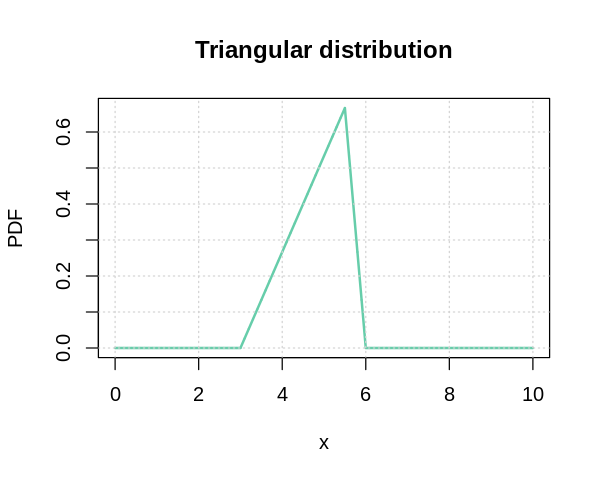

In [1]:
#choose function parameters

repeat{
    
    num <- readline(prompt = 'Enter [A < C < B] separated by comma : ')
    num <- strsplit(num,',')
    num <- as.numeric(unlist(num))
    if(length(num) < 3 ){
        cat(paste0('Not enough parameters \n'))
        flush.console()
    }
    else{
        if (num[2] < num[1] || num[3] < num[2]){
            cat(paste0('C not in [A,B] interval, cannot define distribution \n'))
            flush.console()
        }
        else{
            A <- num[1]
            B <- num[3]
            C <- num[2]
            break
        }
    }
}


#define pdf
dtr  <- function(x, a, b, c){
    if (c<a || b<c){
        paste('c not in [a,b] interval, cannot define distribution')
    }
    else{
        ifelse((x >= a && x <= b), ifelse(x < c, 2*(x-a)/((b-a)*(c-a)) , 2*(b-x)/((b-a)*(b-c))), 0)
    }
}

x <- seq(0, 10, 0.1)
pdf_data <- sapply(x, dtr, a = A, b = B, c = C) # same as Vectorize(dtr)(x, a, b, c)


#plot the function, given the interval (a, b)
options(repr.plot.width= 5, repr.plot.height=4)
plot(x, pdf_data, pch=20, cex=.1, col='aquamarine3', xlab = 'x', ylab = 'PDF', main = 'Triangular distribution')
lines(x, pdf_data, col='aquamarine3', lty = 1, lw=2)
grid()

#### b) and write an algorithm to generate random numbers from the triangular distribution

### Defining the functions

- **PDF** : the pdf is given, so it suffices to implement it, and it was done in the previous part.

- **CDF**: by definition the cdf is the integral of the pdf; it is manually defined as a function defined by cases, altough the integration function can also be used.

* **quantile function**: the cdf is inverted manually for each interval.

- **random variable sampling function**: since the quantile function is defined, the inverse transform sampling method can be used.

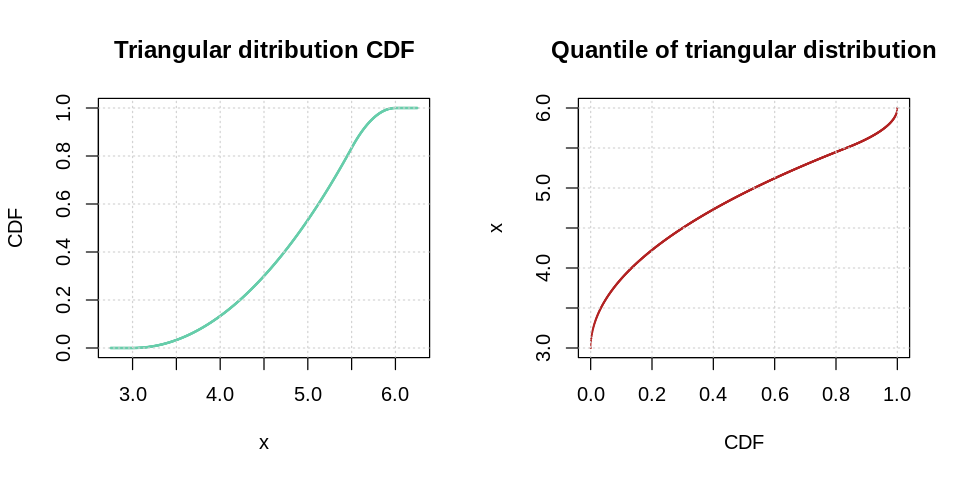

In [7]:
ptr  <- function(x, a, b, c){
    
        ifelse((x >= a && x <= b), ifelse(x < c, (x-a)^2/((b-a)*(c-a)),
                                          ((b-c)^2-(b-x)^2)/((b-a)*(b-c)) + (c-a)/(b-a) ), ifelse(x > b, 1, 0))
    
}

qtr <- function(x, a, b, c){
    p <- (c-a)/(b-a)
    if ( x<= p) {a+sqrt(x*(b-a)*(c-a))}
    else {b-sqrt((1-x)*(b-a)*(b-c))}
}

rtr <- function(x, a, b, c){
    t <- runif(x)
    sapply(t, qtr, a = a, b = b, c = c)
}

x <- seq(A - 0.25, B + 0.25, length.out = 1000) #include extra values to check it's zero outside [a,b]=[0,1]
cdf_data <- sapply(x, ptr, a = A, b = B, c = C)

par(mfrow = c(1,2))
options(repr.plot.width = 8, repr.plot.height = 4)
plot(x, cdf_data, pch=20, cex=.1, col='aquamarine3', xlab = 'x', ylab = 'CDF', main = 'Triangular ditribution CDF')
lines(x, cdf_data, col='aquamarine3', lty = 1, lw=2)
grid()



invx <- seq(0, 1, length.out = 1000)

q_data <- sapply(invx, qtr, a = A, b = B, c = C) #fix the parameters in order to have a function of x only

plot(invx, q_data, pch=20, cex=.1, col='firebrick', xlab = 'CDF', ylab = ' x ', main ='Quantile of triangular distribution')
lines(invx, q_data, col = 'firebrick', lty = 1, lw = 1)
grid()

#### c) generate 10000 random number from the distribution, show them in an histogram and superimpose the analytical curve.

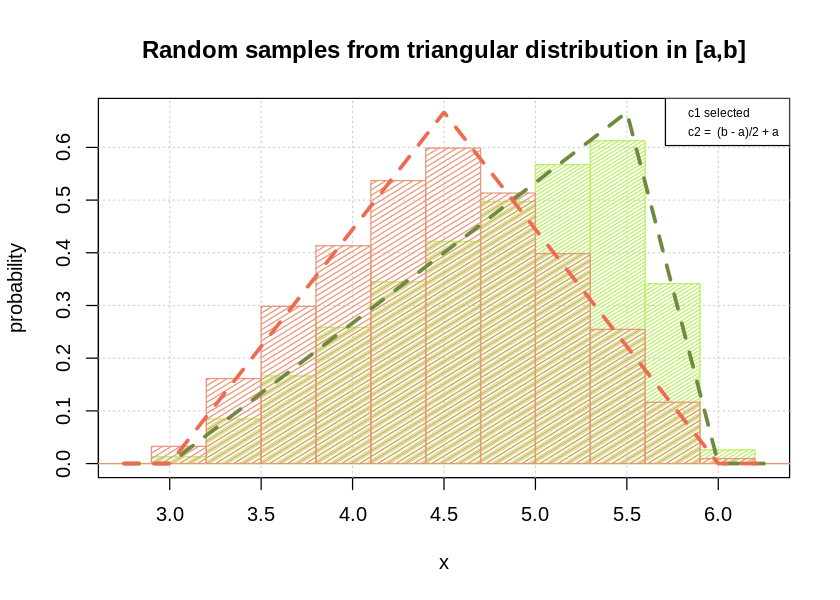

In [8]:
options(repr.plot.width= 7, repr.plot.height=5)
N <- 10000

C1 <- (B - A)/2 + A
pdf_data1 <- sapply(x, dtr, a = A, b = B, c = C)
pdf_data2 <- sapply(x, dtr, a = A, b = B, c =  C1)
hist_data1 <- rtr(N, a = A, b = B, c = C)
hist_data2 <- rtr(N, a = A, b = B, c = C1)


plot(x, pdf_data1, pch=20, cex=0, col='red', xlab = 'x', ylab = 'probability', main = 'Random samples from triangular distribution in [a,b]') #, ylim=c(0,1.1))
grid()
breaks <- seq(2, 8, 0.3)
hist(hist_data1, breaks = breaks, prob = TRUE, add=TRUE, col = 'darkolivegreen2', density = 30)
hist(hist_data2, breaks = breaks, prob = TRUE, add=TRUE, col = 'darksalmon', density = 20)
lines(x ,pdf_data1, col='darkolivegreen4', lty = 2, lw=3)
lines(x ,pdf_data2, col='coral2', lty = 2, lw = 3)
legend('topright', c('c1 selected', 'c2 =  (b - a)/2 + a'),
       col=c('darkolivegreen2', 'darksalmon'), cex = 0.6,y.intersp = 2)

# Exercise 2

Markov’s inequality represents an upper bound to probability distributions:

$$ P(X \geq k) ≤ \frac{E[X]}{k} \ for \ k > 0 $$

having defined a function 
$$ G(k) = 1 − F(k) \equiv P(X \geq k)$$

plot G(k) and the Markov’s upper bound for

*a) the exponential, Exp(λ = 1), distribution function*

*b) the uniform, U (3, 5), distribution function*

*c) the binomial, Bin(n = 1, p = 1/2), distribution function*

*d) a Poisson, Pois(λ = 1/2), distribution function*

To ease the calculation and do the exercise in a more compact way, I use the 'invoke_map' function to combine the functions and the list of parameters.

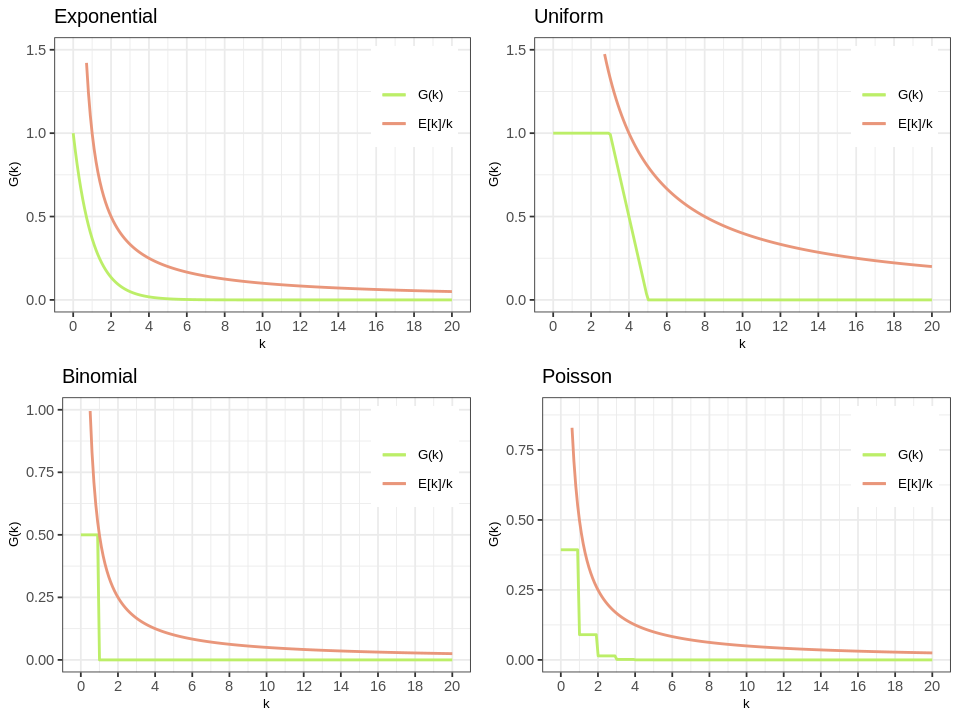

In [5]:
distributions <- c(pexp, punif, pbinom, ppois)


parameters <- list(list(rate = 1),
             list(min = 3, max = 5),
             list(size = 1, prob = 1/2),
             list(lambda = 1/2))

expect_values <- c(1, 4, 0.5, 0.5)

#k <- seq(0, 100, len=1000)
k <- seq(0, 20, len=200)

titles <- list('Exponential', 'Uniform', 'Binomial', 'Poisson')

F <- invoke_map(distributions, parameters, k)

options(repr.plot.width = 8, repr.plot.height = 6)
par(mfrow = c(2,2))


plot_distribution <- function(i){
    
    ggplot() + geom_line(aes( k, 1- unlist(F[i]), color = 'G(k)'), size = 0.8) + #F[[i]]
                    geom_line(aes(k, expect_values[i]/k, color = 'E[k]/k'), size = 0.8) +
    ylim(0, max(1 - unlist(F[i])) + 1/2 ) +
    labs(title = titles[i], x = 'k', y = 'G(k)') +
    scale_color_manual(name = '', values = c('G(k)' = 'darkolivegreen2', 'E[k]/k' = 'darksalmon')) +
    theme_bw() +
    scale_x_continuous(breaks = scales::pretty_breaks(n = 10), lim = c(0, 20))+
    theme(plot.title=element_text(size=12),
    axis.title.x=element_text(size= 8),
    axis.title.y=element_text(size= 8),
    legend.text = element_text(size = 8),
    legend.position = c(0.97, 0.97),
    legend.justification = c('right', 'top'))
}

                              
plt <- lapply(1:4, plot_distribution)

do.call(grid.arrange, plt)


# Exercise 3

Chebyshev’s inequality tell us that:
$$ P(|X-\mu|\geq k\sigma)\leq \frac{1}{k^2} $$

And this can also be written as

$$P(|X-\mu|<k\sigma)\geq1-\frac{1}{k^2} $$

The left hand side of the Chebyshev’s inequality can be rewritten defining G as:
$$ G(k, \mu, \sigma) \equiv 1- P(|X-\mu| < k \sigma) = 1- P(X < \mu +k \sigma) + P(X < \mu- k \sigma) $$

use R to show, with a plot, that Chebyshev’s inequality is is an upper bound to the
following distributions:

*a) a normal distribution, N(μ = 3, σ = 5)*

*b) an exponential distribution, Exp(λ = 1)*

*c) a uniform distribution U (1 − √2, 1 + √2)*

*d) a Poisson, Pois(λ = 1/3), distribution function*

To ease the calculation and do the exercise in a more compact way, I defined 'cheb' to define g, and I use the 'invoke_map' function to combine the functions and the list of parameters.

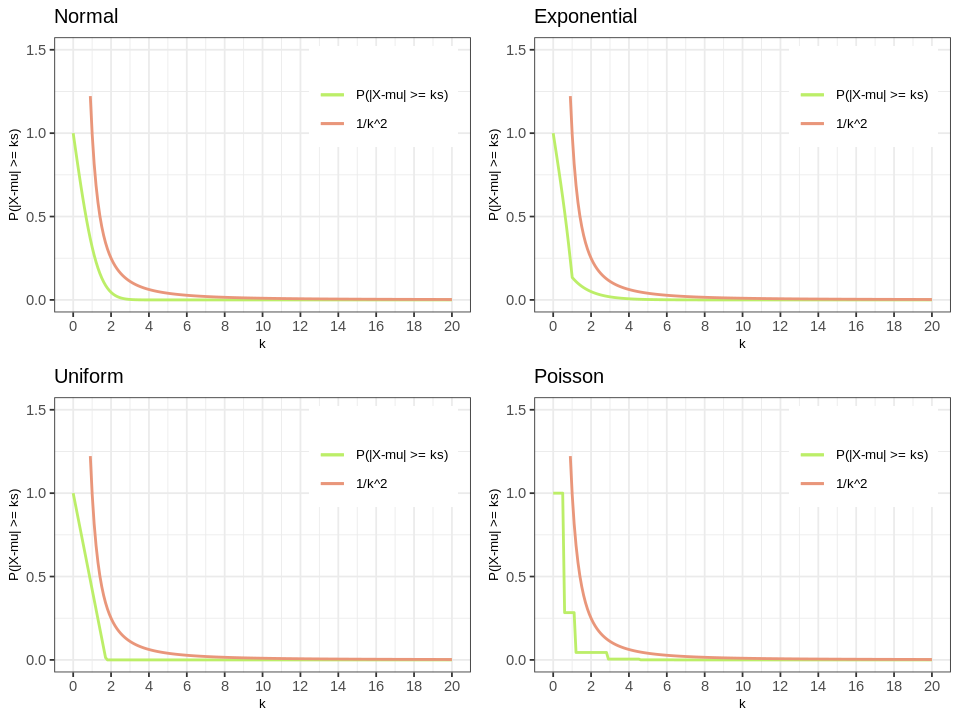

In [13]:
cheb <- function(x, f, mu, sigma, ...) {
    g <- 1 - f(mu+x*sigma, ...) + f(mu-x*sigma, ...)
    return(g)
}


parameters <- list(list(f = pnorm, mu = 3, sigma = 5, mean = 3, sd = 5),
              list(f = pexp, mu = 1, sigma = 1, rate = 1),
              list(f = punif, mu = 1, sigma = 2*sqrt(1/6), min = 1-sqrt(2), max = 1+sqrt(2)),
              list(f = ppois, mu = 1/3, sigma = sqrt(1/3), lambda = 1/3)
              )


k <- seq(0, 20, len=200)

titles <- list('Normal', 'Exponential', 'Uniform', 'Poisson')

P <- invoke_map(cheb, parameters, k)

options(repr.plot.width = 8, repr.plot.height = 6)
par(mfrow = c(2,2))


plot_distribution_cheby <- function(i){
    
    ggplot() + geom_line(aes(k, unlist(P[i]), color = 'P(|X-mu| >= ks)'), size = 0.8) + #P[[i]]
                    geom_line(aes(k, 1/k^2 , color = '1/k^2'), size = 0.8) +
    ylim(0, max(unlist(P[i])) + 1/2 ) +
    labs(title = titles[i], x = 'k', y = 'P(|X-mu| >= ks)') +
    scale_color_manual(name = '', values = c('P(|X-mu| >= ks)' = 'darkolivegreen2', '1/k^2' = 'darksalmon')) +  
    theme_bw() +
    scale_x_continuous(breaks = scales::pretty_breaks(n = 10), lim = c(0, 20))+
    theme(plot.title=element_text(size=12),
    axis.title.x=element_text(size= 8),
    axis.title.y=element_text(size= 8),
    legend.text = element_text(size = 8),
    legend.position = c(0.97, 0.97),
    legend.justification = c('right', 'top'))
}

plt <- lapply(1:4, plot_distribution_cheby)

do.call(grid.arrange, plt)

# Exercise 4

The six boxes toy model is described in reference [1]. Write a program in R that:
- allows the user to insert the color of a randomly extracted box and
- prints on the standard output the probability of selecting each box
- plots the probability for each box as a function of the extraction step

Let $H_i$ be the hypothesis the box contains $i$ white stones, $E_k$ the event corresponding to the sampling of a stone $k$ (where $k$ is either black or white), and $I$ the previously available information. Then Bayes' theorem becomes:
    \begin{equation}
    p(H_i|E_k I) = \frac{p(E_k|H_i I)p(H_i|I)}{p(E_k|I)}
    \end{equation}
    
The evidence, is the L1 norm of the likelihood $\times$ prior, and ensures that the posterior is normalized.
It can be written as
\begin{equation}
   p(E_k|I) = \sum_{i=0}^5 p(E_k|H_i I)p(H_i|I) \in \mathbb{R}
\end{equation}

Given that the box $i$ was selected; then the probability of picking a white stone is $i/5$, because this is the ratio of white to total number of stones.
This means that:
\begin{equation}
      p(E_k|H_i I) =
      \left \{
        \begin{array}
         \\ i/5 \qquad \text{if $k$ = white}
         \\1-i/5 \ \ \text{if $k$ = black}
   \end{array}
\right \}
\end{equation}

The cases can be rewritten mapping $k \in [\text{W},\text{B}] \to j \in [0,1]$:

\begin{equation}
    p(E_j|H_i I) = |j - i/5|
\end{equation}

To implement this I created different function with different roles
- posterior: given the prior the data and the index of the box, computes the posterior
- read_data: takes in input the sequence of the extractes stones decided by the user
- manipulate_data: given the sequence, it computes the probability for each box at each iteration and wraps all in a dataframe
- plot_data and plot_data_separated: given the dataframe they plot the data in two different ways

In [7]:
posterior <- function(prior, data, j) { # Bayes' theorem
    likelihood <- abs(data - j/5)
    likelihoodxprior <- likelihood * prior
    evidence <- sum(likelihoodxprior)
    posterior <- likelihoodxprior/evidence
    return (posterior)
}

read_data <- function(){   

    color <- character()
    
    repeat{
    
        c <- readline(prompt = 'Which color has been extracted? [White: W, Black: B, Quit: Q] \n')
        if (c == 'W'){
            color <- c(color, c)
        }
        else if(c == 'B'){
            color <- c(color, c)
        }
        else if (c == 'Q'){
            break
        }
    }
    return(color)
    
}

manipulate_data <- function(P, j, color_list){
    
    prob <- P
    color_list <- c('start', color_list)

    
    for (c in color_list){
        if (c == 'W'){
            P <- posterior(P, data = 0, j)
            prob <- rbind(prob, P)
        }
        else if(c == 'B'){
            P <- posterior(P, data = 1, j)
            prob <- rbind(prob, P)
        }
    }

    df <- data.frame(prob)
    rnames <- seq(0, nrow(df)-1)
    rownames(df) <- rnames
    df <- cbind(df, rnames)
    df <- cbind(df, color_list)
    cnames <- c(sprintf('H%d', j), 'n_trial', 'color')
    colnames(df) <- cnames
    return(df)
}


j <- 0:5
P0 <- rep(1/6, 6)

colors <- read_data()
paste(colors)
prob <- manipulate_data(P0, j, colors)
prob

Which color has been extracted? [White: W, Black: B, Quit: Q] 
B
Which color has been extracted? [White: W, Black: B, Quit: Q] 
B
Which color has been extracted? [White: W, Black: B, Quit: Q] 
B
Which color has been extracted? [White: W, Black: B, Quit: Q] 
W
Which color has been extracted? [White: W, Black: B, Quit: Q] 
B
Which color has been extracted? [White: W, Black: B, Quit: Q] 
W
Which color has been extracted? [White: W, Black: B, Quit: Q] 
W
Which color has been extracted? [White: W, Black: B, Quit: Q] 
B
Which color has been extracted? [White: W, Black: B, Quit: Q] 
B
Which color has been extracted? [White: W, Black: B, Quit: Q] 
W
Which color has been extracted? [White: W, Black: B, Quit: Q] 
B
Which color has been extracted? [White: W, Black: B, Quit: Q] 
W
Which color has been extracted? [White: W, Black: B, Quit: Q] 
Q


[1] "B" "B" "B" "W" "B" "W" "W" "B" "B" "W" "B" "W"

,H0,H1,H2,H3,H4,H5,n_trial,color
0,0.1666667,0.1666667,0.1666667,0.16666667,0.166666667,0.1666667,0,start
1,0.3333333,0.2666667,0.2000000,0.13333333,0.066666667,0.0000000,1,B
2,0.4545455,0.2909091,0.1636364,0.07272727,0.018181818,0.0000000,2,B
3,0.5555556,0.2844444,0.1200000,0.03555556,0.004444444,0.0000000,3,B
4,0.0000000,0.4383562,0.3698630,0.16438356,0.027397260,0.0000000,4,W
5,0.0000000,0.5446809,0.3446809,0.10212766,0.008510638,0.0000000,5,B
6,0.0000000,0.3459459,0.4378378,0.19459459,0.021621622,0.0000000,6,W
7,0.0000000,0.1828571,0.4628571,0.30857143,0.045714286,0.0000000,7,W
8,0.0000000,0.2628337,0.4989733,0.22176591,0.016427105,0.0000000,8,B
9,0.0000000,0.3494881,0.4976109,0.14744027,0.005460751,0.0000000,9,B


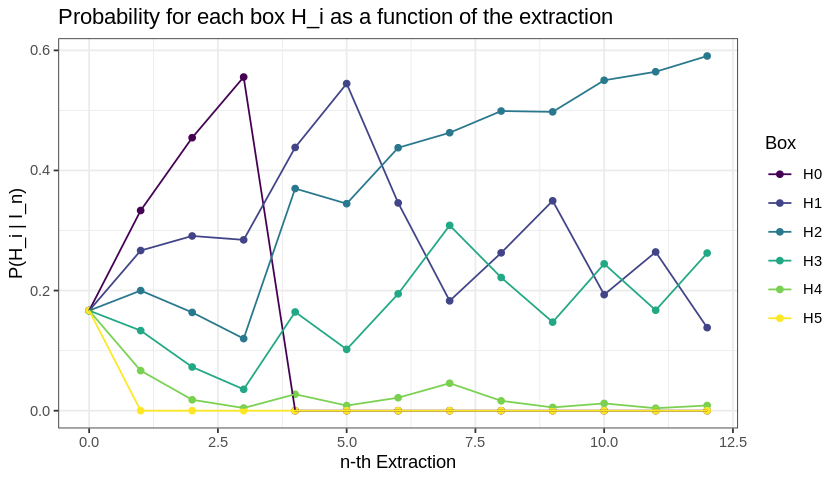

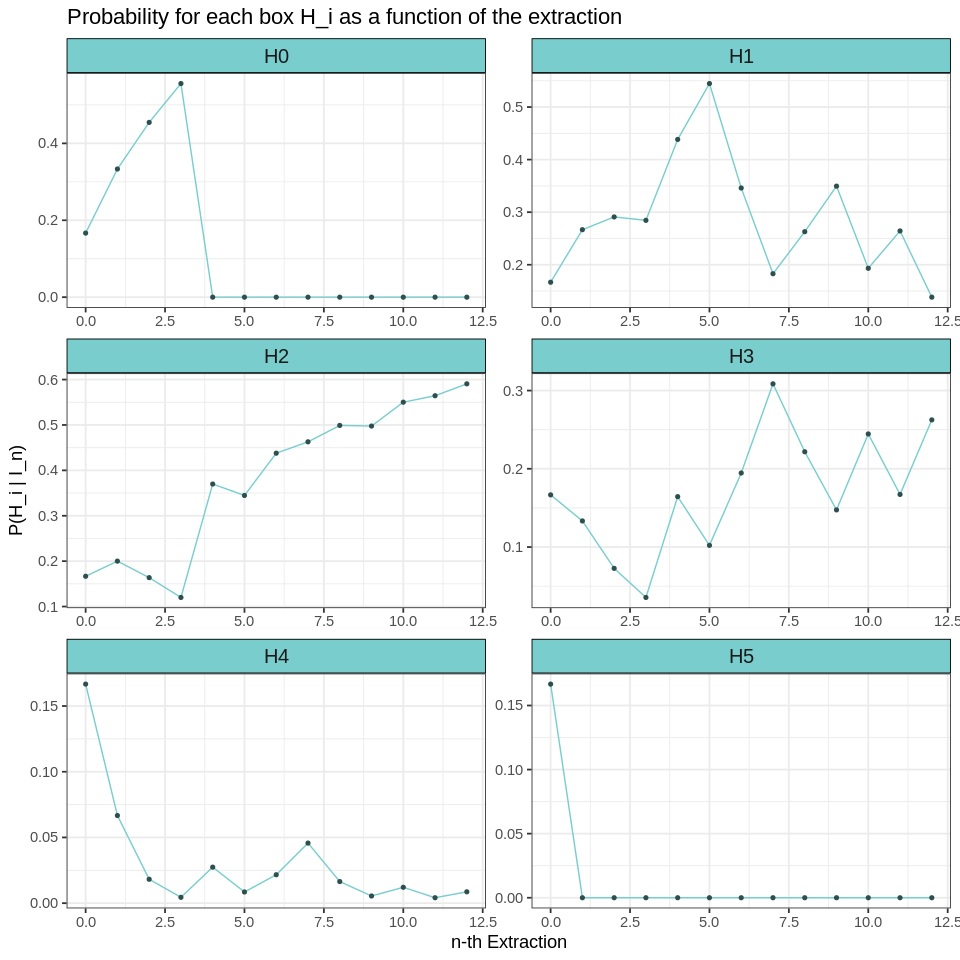

In [8]:
plot_data <- function(prob_df) {
    total_data <- gather(prob_df, box, probability, - c(n_trial, color))

    #total_data

    options(repr.plot.width=7, repr.plot.height=4)
    ggplot(total_data) + 
    geom_point(aes(n_trial, probability, group = box, colour = box)) +
    geom_line(aes(n_trial, probability, group = box, colour=box)) +
    labs(title= 'Probability for each box H_i as a function of the extraction', 
         x='n-th Extraction', y='P(H_i | I_n)', col='Box') +
    scale_color_viridis(discrete=TRUE)+
    theme(plot.title = element_text(color="black", size=13
                                    , face="bold.italic"), 
              axis.title.x = element_text(color="black", size=12),
              axis.title.y = element_text(color="black", size=12), 
              axis.ticks.length=unit(.25, "cm"),
              axis.text.x = element_text(size=9),
              axis.text.y = element_text(size=9)) +
    theme_bw()

# plot using ggplot2
#total_data %>%
#  ggplot(aes(x = n_sample, y = probability, color = box)) +
#  geom_line()
    
    }


plot_data_separated <- function(prob_df) {
    
    options(repr.plot.width=8, repr.plot.height=8)
    
    total_data <- gather(prob_df, box, probability, - c(n_trial, color))
    
    plot <- ggplot(total_data) +
    geom_line(aes(n_trial, probability), colour = 'darkslategray3', size=0.4) +
    geom_point(aes(n_trial, probability), colour = 'darkslategray', size = 0.8) + 
    labs(title= 'Probability for each box H_i as a function of the extraction', 
         x='n-th Extraction', y='P(H_i | I_n)', col='Box') +
    theme(plot.title = element_text(color = 'black', size=16, face = 'bold.italic'), 
          axis.title.x = element_text(color = 'black', size=15),
          axis.title.y = element_text(color = 'black', size=15), 
          axis.ticks.length=unit(.25, 'cm'),
          axis.text.x = element_text(size=9),
          axis.text.y = element_text(size=9))+
    theme_bw()
    
    
    plot +
    facet_wrap(. ~ box, scales='free', ncol=2)+
    theme(strip.text.x = element_text(size=12), 
          strip.background = element_rect(colour = 'black', fill = 'darkslategray3', size = 0.5, linetype = 'solid'))

}

plot_data(prob)
plot_data_separated(prob)

# Exercise 5

consider again the six boxes toy model of the previous exercise and write a simulation program that:
- selects a random box
- makes random sampling from the box
- prints on the standard output the probability of selecting each box
- plots the probability for each box as a function of the number of trial

Here it is simulated the choice of a box and the sampling from that same box.

The function used are the same of the previous exercise except from the one simulating the data.

As expected, given enough iterations, it can be seen from the plots that the probability associated to the selected box increases, whereas the probability associated to the other boxes decreases and goes to 0.

[1] "Selected box:  2 , containing  2 white balls and  3 black balls"

[1] "B" "B" "W" "B" "B" "W" "W" "B" "W" "B" "B" "B" "B" "W" "W" "W" "B" "W" "B"
[20] "B" "B" "B" "B" "B" "B" "W" "B" "W" "B" "B" "W" "W" "W" "B" "B" "W" "W" "W"
[39] "B" "W" "B" "B" "B" "B" "B" "W" "W" "B" "B" "B" "W" "B" "W" "B" "B" "B" "W"
[58] "B" "B" "W" "B" "W" "W" "W" "B" "W" "B" "B" "B" "W"

,H0,H1,H2,H3,H4,H5,n_trial,color
0,0.1666667,0.1666667,0.1666667,0.16666667,0.166666667,0.1666667,0,start
1,0.3333333,0.2666667,0.2000000,0.13333333,0.066666667,0.0000000,1,B
2,0.4545455,0.2909091,0.1636364,0.07272727,0.018181818,0.0000000,2,B
3,0.0000000,0.3200000,0.3600000,0.24000000,0.080000000,0.0000000,3,W
4,0.0000000,0.4383562,0.3698630,0.16438356,0.027397260,0.0000000,4,B
5,0.0000000,0.5446809,0.3446809,0.10212766,0.008510638,0.0000000,5,B
6,0.0000000,0.3459459,0.4378378,0.19459459,0.021621622,0.0000000,6,W
7,0.0000000,0.1828571,0.4628571,0.30857143,0.045714286,0.0000000,7,W
8,0.0000000,0.2628337,0.4989733,0.22176591,0.016427105,0.0000000,8,B
9,0.0000000,0.1319588,0.5010309,0.33402062,0.032989691,0.0000000,9,W


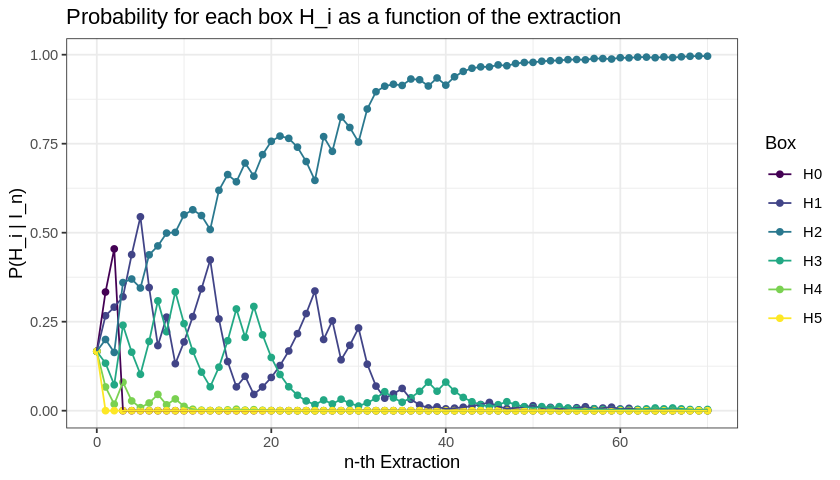

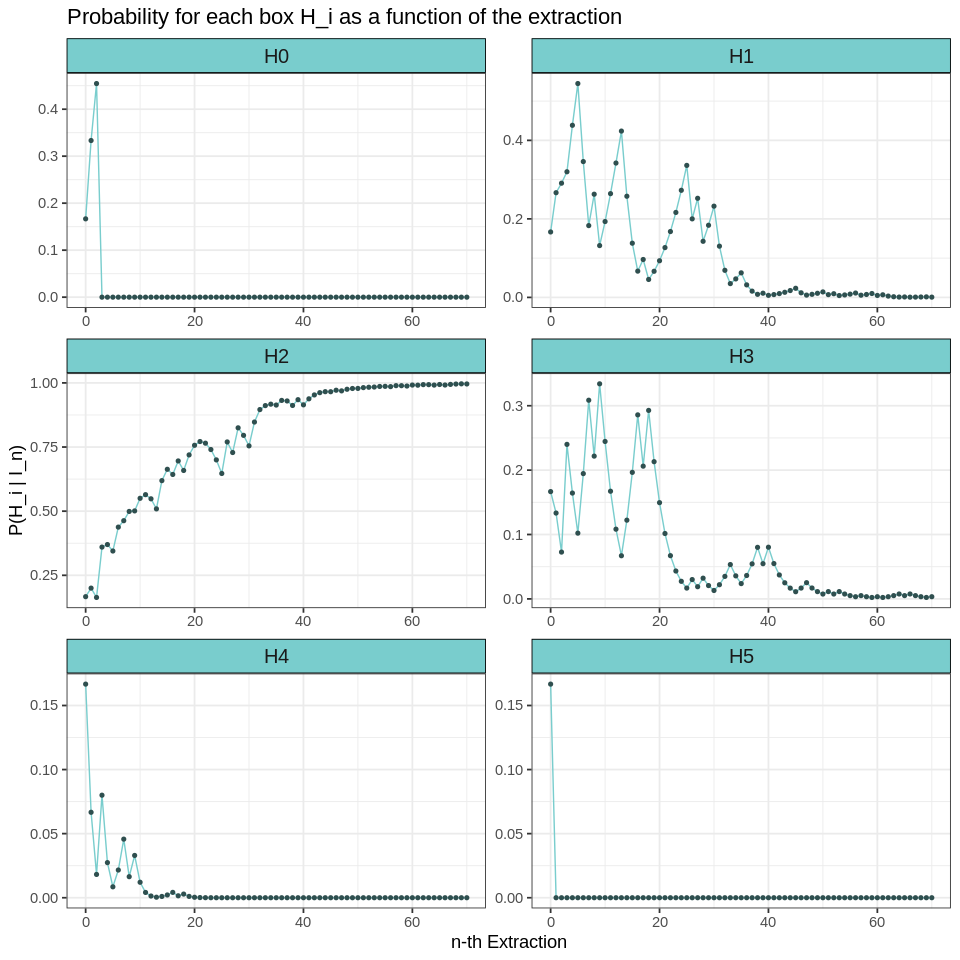

In [9]:
box <- sample(j, 1)
paste('Selected box: ', box, ', containing ', box, 'white balls and ', 5-box, 'black balls')


#Extraction process
N <- 70 #number of extractions
samples <- sample(1:5, N, replace = T) #sampling with replacement
color_sequence <- ifelse(samples <= box, 'W', 'B')
color_sequence

extracted_prob <- manipulate_data(P0, j, color_sequence)
head(extracted_prob, 10)
plot_data(extracted_prob)
plot_data_separated(extracted_prob)